# Test 7 décembre 2018
*Projet Pully/EPFL/Swisscom*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
from pandas import Series, DataFrame
from importlib import reload
from IPython.display import display, Markdown, Latex, HTML
import visualisation as vs
import pdb

### Importation des données

In [28]:
import importdata
reload(importdata)
from importdata import importPed, importVeh, importSC, importTL


#fichiers
ped_file = '../ped_dec2018.csv' #fichier piétons
sc_file = '../swisscom_7dec18.csv' #fichier swisscom
veh_file = '../veh_dec2018.csv' #fichier vehicules
tl_file = '../TL_novdec2018.xlsx'#fichier TL

#periode de calcul
start = pd.to_datetime('12/07/2018 00:00')
end = pd.to_datetime('12/07/2018 23:00') 

#importation des fichiers

ped_data = importPed(ped_file,start,end, calib = False)

veh_data = importVeh(veh_file,start,end)
sc_data = importSC(sc_file, start,end, mode = True)
tl_data = importTL(tl_file, start, end, sheet = 3)

sc_data.drop('Total', axis=1, inplace = True)
sc_data.rename(columns={'Road': 'Total'}, inplace = True)
    


#verification
#print('PIETONS:')
#print(ped_data.head())
#print('\n')
#print('VOITURES:')
#print(veh_data)
#print('\n')
#print('SWISSCOM:')
#print(sc_data.head())
#print('\n')
#print('TL:')
#print(tl_data.head())


In [29]:
#mise en forme des données sous forme de tableau

ped = ped_data[['Date','Total']]
sc = sc_data[['Date','Total']]
veh = veh_data[['Date','Total']]
tl = tl_data[['Date','Total']]


bigd = ped.set_index('Date').join(veh.set_index('Date'), lsuffix = "_piet", rsuffix ="_veh")
bigd = bigd.join(tl.set_index('Date'), rsuffix = "_tl")
bigd =bigd.join(sc.set_index('Date'), rsuffix ="_sc")
bigd.rename(columns={"Total_piet": "Pietons", "Total_veh": 'TIM', "Total": "TC", "Total_sc": "Swisscom" }, inplace=True)

bigd.reset_index(inplace = True)

big2 = bigd.copy()

,Date,Pietons,TIM,TC,Swisscom
0,2018-12-07 00:00:00,2,74,2.6,113
1,2018-12-07 01:00:00,0,31,0.0,21
2,2018-12-07 02:00:00,1,12,0.0,0
3,2018-12-07 03:00:00,0,20,0.0,0
4,2018-12-07 04:00:00,2,17,0.0,28
5,2018-12-07 05:00:00,0,52,3.4,79
6,2018-12-07 06:00:00,47,236,8.4,315
7,2018-12-07 07:00:00,163,587,41.4,931
8,2018-12-07 08:00:00,275,509,23.6,739
9,2018-12-07 09:00:00,365,486,16.6,543


In [30]:
#calcul des parts modales
bigd['Total'] = bigd.Pietons + np.multiply(bigd.TIM,1.1) + bigd.TC 
perc_trafic = bigd.copy()
perc_trafic['Pietons'] = 100* perc_trafic['Pietons']/perc_trafic['Total']
perc_trafic['TIM'] = 100* np.multiply(perc_trafic['TIM'],1.1)/perc_trafic['Total'] #il faut multiplier par 1.1
perc_trafic['TC'] = 100* perc_trafic['TC']/perc_trafic['Total']
perc_trafic.drop(['Swisscom'], axis = 1, inplace = True)
perc_trafic.index.rename("Heure", inplace = True)

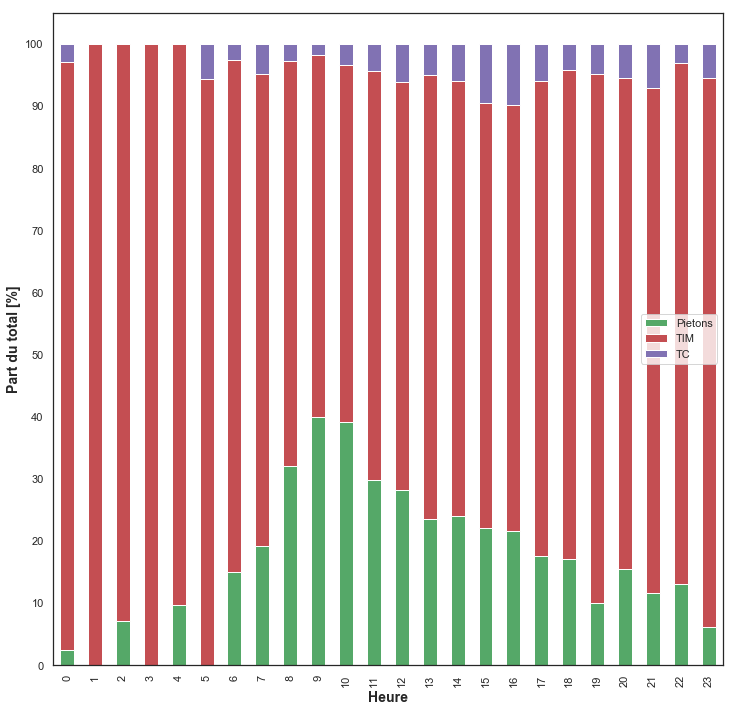

In [31]:
#visualisation des parts modales pour la semaine totale

sns.set()
sns.set_color_codes()
sns.set_style("white")
pal = ['g', 'r', 'm']
f, ax1 = plt.subplots(figsize=(12,12))
perc_trafic[['Pietons', 'TIM', 'TC']].plot(ax= ax1,kind='bar', stacked = True, color = [pal[0], pal[1], pal[2]] )
ax1.set_title("Répartition modale horaire", {'fontweight': 'bold'})
ax1.set_ylabel("Part du total [%]", {'fontweight': 'bold', 'fontsize': 14})
ax1.set_xlabel("Heure", {'fontweight': 'bold', 'fontsize': 14})
ax1.set_yticks(np.arange(0,101,10))

plt.show()

## Exportation

In [32]:
#exportation des fichiers pour réutilisation

str_start = start.strftime("%d%m")
str_end = end.strftime("%d%m")
filename = str_start+"-"+ str_end
bigd.drop('Date', axis=1, inplace = True)
bigd.to_csv(filename + "_TEST.csv")


print('Exportation terminée')


Exportation terminée


## Modèle analytique

#### Pas de correction CFF

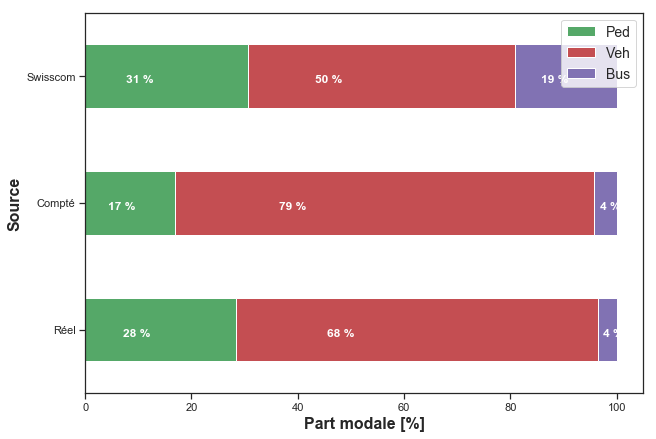

In [33]:
sns.set_style('ticks')

h = np.arange(0,24)
solution = pd.read_csv('solutionTEST.csv', sep=',', header = None, names = h)
modalreel = solution.iloc[5:8].mean(axis = 1)
modalsc = solution.iloc[8:11].mean(axis=1)
modalcomp = perc_trafic[['Pietons', 'TIM', 'TC']].mean(axis =0)

modalreel.reset_index(drop = True, inplace = True)
modalsc.reset_index(drop=True, inplace = True)
modalcomp.reset_index(drop=True, inplace = True)

ms = pd.concat([modalreel*100,modalcomp,modalsc*100], axis = 1)
ms.reset_index(inplace = True, drop = True)

ms = ms.T

ms.rename(index={0: 'Réel', 1: 'Compté', 2: 'Swisscom'}, columns = {0: 'Ped', 1:'Veh', 2:'Bus'}, inplace = True)

f, ax1 = plt.subplots(figsize=(10,7))
ms[['Ped', 'Veh', 'Bus']].plot(ax = ax1, kind = 'barh', stacked = True, color=['g', 'r', 'm'])
ax1.set_xlabel('Part modale [%]',{'fontweight': 'bold', 'fontsize': 16})
ax1.set_ylabel('Source', {'fontweight': 'bold', 'fontsize': 16})
ax1.legend(loc = 'best', fontsize=14)

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate('{:.0f} %'.format(width), (p.get_x()+.25*width, p.get_y()+.4*height), weight='bold', color='w')

plt.show()



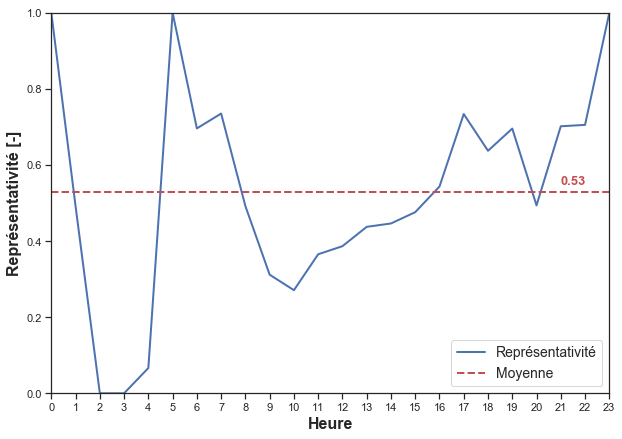

In [34]:

alpha = solution.iloc[4,:]

xmean = np.arange(0,24,1)
ymean = alpha.mean(axis=0)*np.ones_like(xmean)

plt.figure(figsize=[10,7])
plt.plot(alpha, linewidth = 2, label='Représentativité')
plt.plot(xmean, ymean, 'r--', linewidth = 2, label='Moyenne')
plt.ylim([0,1])
plt.xlim([0,23])
plt.xticks(np.arange(0,24,1))
plt.ylabel("Représentativité [-]", {'fontweight': 'bold', 'fontsize': 16})
plt.xlabel("Heure", {'fontweight': 'bold', 'fontsize': 16})
plt.text(21, alpha.mean(axis=0)+0.02, '{:.2f}'.format(alpha.mean(axis=0)), color='r', weight = 'bold', size=13)
plt.legend(loc='best', fontsize=14)
plt.show()

#### Avec correction CFF

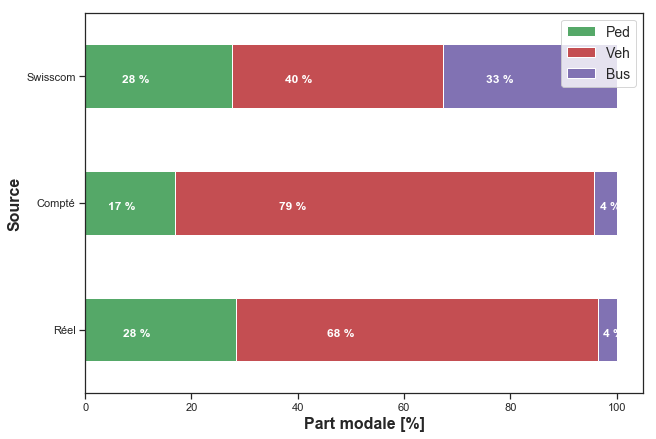

In [51]:
solution = pd.read_csv('solutionTESTnoCFF.csv', sep=',', header = None, names = h)
modalreel = solution.iloc[5:8].mean(axis = 1)
modalsc = solution.iloc[8:11].mean(axis=1)

modalreel.reset_index(drop = True, inplace = True)
modalsc.reset_index(drop=True, inplace = True)


ms = pd.concat([modalreel*100,modalcomp,modalsc*100], axis = 1)
ms.reset_index(inplace = True, drop = True)

ms = ms.T

ms.rename(index={0: 'Réel', 1: 'Compté', 2: 'Swisscom'}, columns = {0: 'Ped', 1:'Veh', 2:'Bus'}, inplace = True)

f, ax1 = plt.subplots(figsize=(10,7))
ms[['Ped', 'Veh', 'Bus']].plot(ax = ax1, kind = 'barh', stacked = True, color=['g', 'r', 'm'])
ax1.set_xlabel('Part modale [%]',{'fontweight': 'bold', 'fontsize': 16})
ax1.set_ylabel('Source', {'fontweight': 'bold', 'fontsize': 16})
ax1.legend(loc = 'best', fontsize=14)

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate('{:.0f} %'.format(width), (p.get_x()+.25*width, p.get_y()+.4*height), weight='bold', color='w')

plt.show()

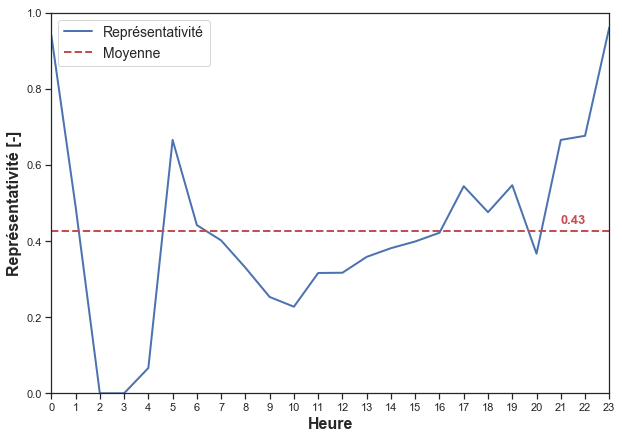

In [25]:

alpha = solution.iloc[4,:]

xmean = np.arange(0,24,1)
ymean = alpha.mean(axis=0)*np.ones_like(xmean)

plt.figure(figsize=[10,7])
plt.plot(alpha, linewidth = 2, label='Représentativité')
plt.plot(xmean, ymean, 'r--', linewidth = 2, label='Moyenne')
plt.ylim([0,1])
plt.xlim([0,23])
plt.xticks(np.arange(0,24,1))
plt.ylabel("Représentativité [-]", {'fontweight': 'bold', 'fontsize': 16})
plt.xlabel("Heure", {'fontweight': 'bold', 'fontsize': 16})
plt.text(21, alpha.mean(axis=0)+0.02, '{:.2f}'.format(alpha.mean(axis=0)), color='r', weight = 'bold', size=13)
plt.legend(loc='best', fontsize=14)
plt.show()